In [2]:
from scipy.stats import rv_continuous
import numpy as np
import pandas as pd

In [3]:
data = pd.read_parquet("/Users/cassturk/Downloads/nss68_total_expenditures.parquet")

In [5]:
h = data.head()
S = data['total_value'][:500]


l = data.describe()

hstar = (2740.35*1.06)/(101660**.2)
print("Silverman Bandwidth:")
print(hstar)

Silverman Bandwidth:
289.52220589573596


In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [208]:
#kernels

def K1(u):
    return 0.5*(np.abs(u) < 1)

def K2(u):
    return 0.5*(1-u)*(np.abs(u) < 1)

def K3(u):
    return 3/(4*5**0.5)*(1-u**2/5)*(np.abs(u) < 5**0.5)

kernels = {"Uniform" : K1,
           "Linear"  : K2,
           "Epanechnikov"  : K3
          }

In [202]:
def f_hat(x, X, h, k):
    '''
    x: double, A point to evaluate f_hat at
    X: pd.Series, an array of data points
    h: double, bandwidth
    k: function, the kernel density function
    
    Returns: double, 1/(nh) \sum_i k((x_i - x)/h)
    '''
    n = len(X)
    
    # apply kernel function to each element of X
    k_h = X.apply(lambda x_i: k((x_i - x)/h))
    
    return (1/(n*h))*np.sum(k_h)


Text(0.5, 0.98, 'Estimated PDF with different kernels, bandwidths')

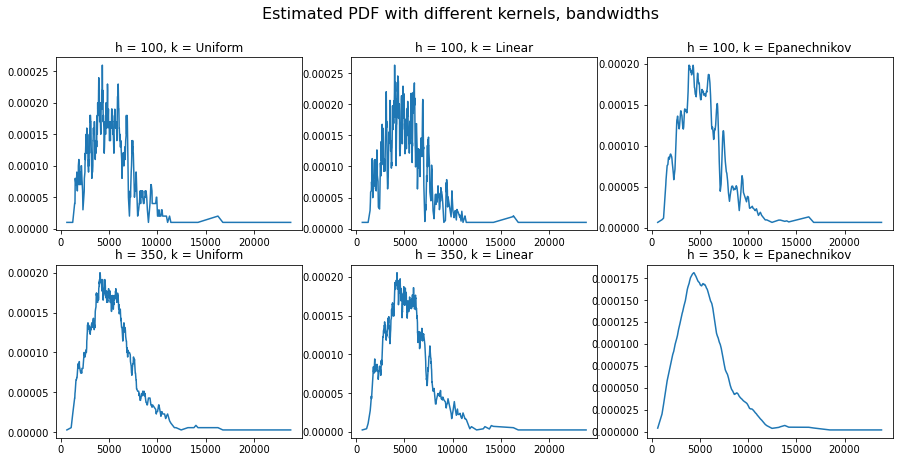

In [210]:
fig, ax = plt.subplots(2, 3, figsize=(15,7))
# sort X so we move across the axis
X = pd.Series(S).sort_values()

# counter is for axis positioning
counter = 0

for h in [100, 350]: # loop over bandwidths
    for name, k in kernels.items(): # loop over kernel names, functions
        # row moves to 1 after 3rd iteration
        if counter < 3:
            row = 0
        else:
            row = 1
        # calculate fhat for each x, plot against x
        ax[row, counter % 3].plot(X, X.apply(lambda x_i: f_hat(x_i, S, h, k)))
        # label 
        ax[row, counter % 3].set_title(f'h = {h}, k = {name}')
        # move counter forward
        counter += 1
      
fig.suptitle("Estimated PDF with different kernels, bandwidths", size=16)

We see that the tradeoffs between bandwidths and kernels are the smoothness of the distribution versus accurately capturing the density of the data it's being trained on. Given that these graphs were created using a truncated data set (sorry--I only have so much computing power), running any of these kernels on the full dataset will result in a smoother looking graph. That being said, I had to continue running these on small data sets, so I chose the Epanechnikov kernel for smoothness. 

This smoothness can be "countered," or give way to a more accurate description of the underlying data by choosing a smaller bandwidth. 

If we calculate the silverman rule of thumb for bandiwdth (done in cell 4), we get a value of about three hundred. In the following bandwidth testing, I decided that three hundred was a little too smooth for my tastes, and instead chose a smaller value of two hundred.

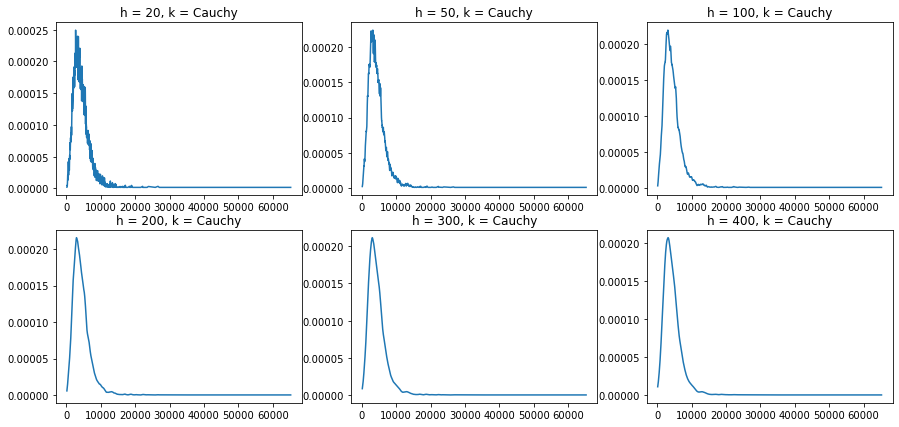

In [103]:
#Choose epanechnikov kernel

#play around with bandwidth
fig, ax = plt.subplots(2, 3, figsize=(15,7))

kernels1 = {
           "Epanechnikov"  : K3
          }

S = data['total_value'][:10000]
X = pd.Series(S).sort_values()
counter = 0

for h in [20, 50, 100, 200, 300, 400]: # loop over bandwidths
    for name, k in kernels1.items(): # loop over kernel names, functions
        # row moves to 1 after 3rd iteration
        if counter < 3:
            row = 0
        else:
            row = 1
        # calculate fhat for each x, plot against x
        ax[row, counter % 3].plot(X, X.apply(lambda x_i: f_hat(x_i, S, h, k)))
        # label 
        ax[row, counter % 3].set_title(f'h = {h}, k = {name}')
        # move counter forward
        counter += 1

In [ ]:
#choose h = 200

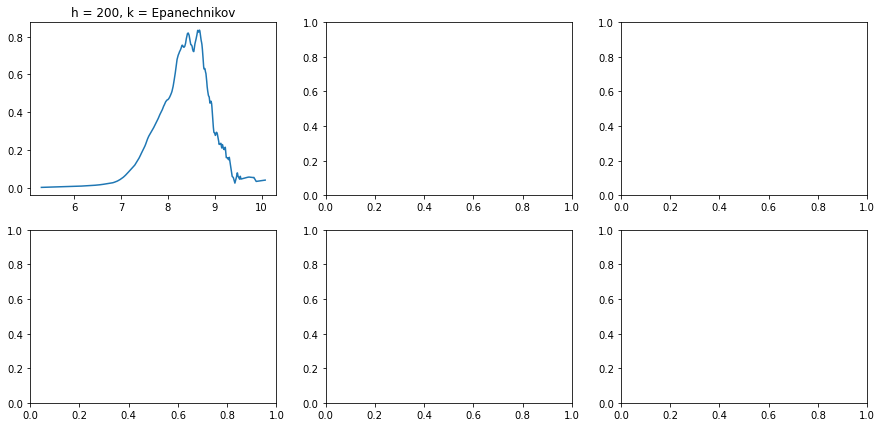

In [203]:


fig, ax = plt.subplots(2, 3, figsize=(15,7))

kernels1 = {
           "Epanechnikov"  : K3
          }

S = data['total_value'][:1000]
X = pd.Series(S).sort_values()
counter = 0



for h in [200]: # loop over bandwidths
    for name, k in kernels1.items(): # loop over kernel names, functions
        # row moves to 1 after 3rd iteration
        if counter < 3:
            row = 0
        else:
            row = 1
        # APPLY INVERSE JACOBIAN HERE !!!!!!!!!!
        ax[row, counter % 3].plot(np.log(X), X.apply(lambda x_i: f_hat(x_i, S, h, k))*X)
        # label 
        ax[row, counter % 3].set_title(f'h = {h}, k = {name}')
        # move counter forward
        counter += 1

In [216]:
#Check silverman for log of data

print(data.apply(np.log).describe())

hstar = (0.545535*1.06)/(101660**.2)
print(hstar)

#gives suggested bandwidth of .05

         total_value
count  101660.000000
mean        8.231237
std         0.545535
min         1.609438
25%         7.917901
50%         8.260234
75%         8.581716
max        12.269798
0.057636614517609173


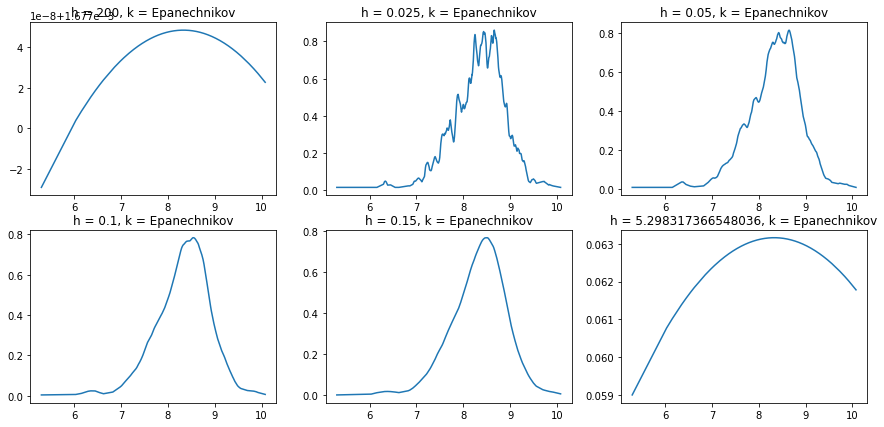

In [213]:
fig, ax = plt.subplots(2, 3, figsize=(15,7))

kernels1 = {
           "Epanechnikov"  : K3
          }

S = data.apply(np.log)['total_value'][:1000]
X = pd.Series(S).sort_values()
counter = 0

for h in [200, .025, .05, .1, .15, np.log(200)]: # loop over bandwidths
    for name, k in kernels1.items(): # loop over kernel names, functions
        # row moves to 1 after 3rd iteration
        if counter < 3:
            row = 0
        else:
            row = 1
        # calculate fhat for each x, plot against x
        ax[row, counter % 3].plot(X, X.apply(lambda x_i: f_hat(x_i, S, h, k)))
        # label 
        ax[row, counter % 3].set_title(f'h = {h}, k = {name}')
        # move counter forward
        counter += 1
        
#note that a bandwidth of 200 here is too large! want to see more variation

#add smaller bandwidths 

#.05 looks pretty good--and follows silverman rule of thumb!

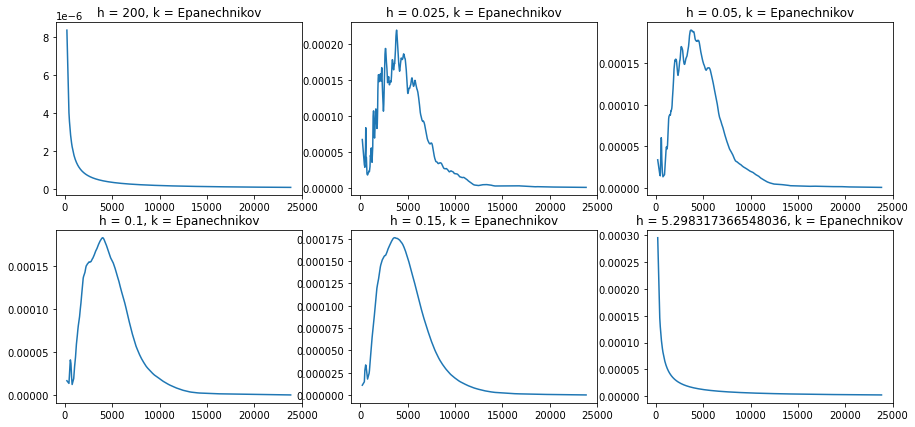

In [214]:
#TRANSFORM BACK? (for fun)

fig, ax = plt.subplots(2, 3, figsize=(15,7))

kernels1 = {
           "Epanechnikov"  : K3
          }

S = data.apply(np.log)['total_value'][:1000]
X = pd.Series(S).sort_values()
counter = 0

for h in [200, .025, .05, .1, .15, np.log(200)]: # loop over bandwidths
    for name, k in kernels1.items(): # loop over kernel names, functions
        # row moves to 1 after 3rd iteration
        if counter < 3:
            row = 0
        else:
            row = 1
        # calculate fhat for each x, plot against x
        ax[row, counter % 3].plot(np.exp(X), X.apply(lambda x_i: f_hat(x_i, S, h, k))/np.exp(X))
        # label 
        ax[row, counter % 3].set_title(f'h = {h}, k = {name}')
        # move counter forward
        counter += 1
        

Using the inverse Jacobian preserves the volatility of your original chosen bandwidth; this saves the trouble of finding a new bandwidth that suits the distribution.